In [1]:
# Import necessary library 
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from numpy import log
from pandas import Series
from datetime import datetime

In [2]:
dataset = pd.read_csv('airline_passengers.csv')
# date = YYYY-MM
dataset.head()

Month  Thousands of Passengers
0  1949-01                      112
1  1949-02                      118
2  1949-03                      132
3  1949-04                      129
4  1949-05                      121

In [3]:
# Required - YYYY-MM-DD
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset

Month  Thousands of Passengers
0   1949-01-01                      112
1   1949-02-01                      118
2   1949-03-01                      132
3   1949-04-01                      129
4   1949-05-01                      121
..         ...                      ...
139 1960-08-01                      606
140 1960-09-01                      508
141 1960-10-01                      461
142 1960-11-01                      390
143 1960-12-01                      432

[144 rows x 2 columns]

In [4]:
dataset.set_index('Month', inplace=True)

In [5]:
dataset.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

<AxesSubplot:xlabel='Month'>

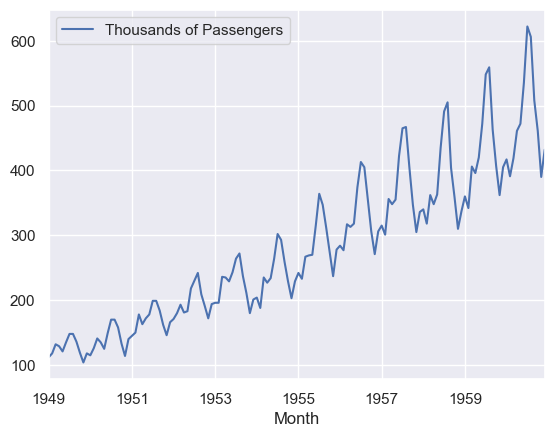

In [6]:
dataset.plot()

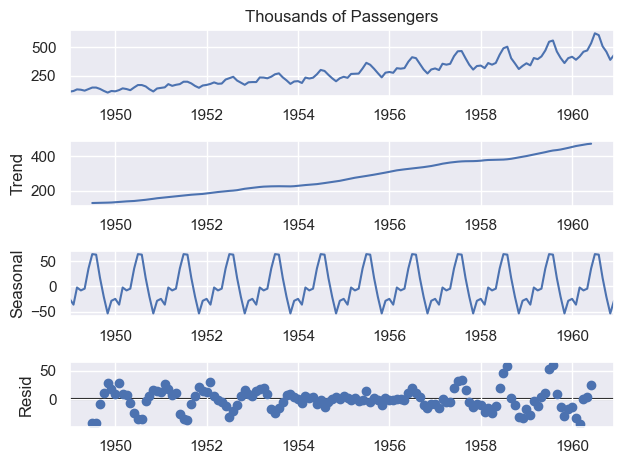

In [8]:
# Decomposition required
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], model='additive', 
                                   period=12)
decomposition.plot()
plt.show()

In [9]:
import statsmodels.api as sm
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

0.0121527966037621

In [ ]:
# Please make sure that your time series would be stationary only then you have to build TS algorithm


# Augmented Dickey Fuller Test - To check whether my dataset is 'Stationary' or 'Non-Stationary'

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [12]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test : To find data is stationary or non-stationary")
    labels = ['ADF Stats Test','P-Values', '#Lags','No. of Observation']
    
    for i , j in zip(result, labels):
        print(j + " = " + str(i))
    
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak evidence against null hypothesis and my time series is Non-Stationary")     

In [14]:
a = 10
b = "abc"
print (b + " = " + str(a))

abc = 10


In [15]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test : To find data is stationary or non-stationary
ADF Stats Test = 0.8153688792060482
P-Values = 0.991880243437641
#Lags = 13
No. of Observation = 130
Weak evidence against null hypothesis and my time series is Non-Stationary


In [16]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [18]:
dataset.head(20)

Thousands of Passengers  1st Diff
Month                                        
1949-01-01                      112       NaN
1949-02-01                      118       6.0
1949-03-01                      132      14.0
1949-04-01                      129      -3.0
1949-05-01                      121      -8.0
1949-06-01                      135      14.0
1949-07-01                      148      13.0
1949-08-01                      148       0.0
1949-09-01                      136     -12.0
1949-10-01                      119     -17.0
1949-11-01                      104     -15.0
1949-12-01                      118      14.0
1950-01-01                      115      -3.0
1950-02-01                      126      11.0
1950-03-01                      141      15.0
1950-04-01                      135      -6.0
1950-05-01                      125     -10.0
1950-06-01                      149      24.0
1950-07-01                      170      21.0
1950-08-01                      170       0.0

In [20]:
adf_check(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test : To find data is stationary or non-stationary
ADF Stats Test = -2.8292668241699994
P-Values = 0.0542132902838255
#Lags = 12
No. of Observation = 130
Weak evidence against null hypothesis and my time series is Non-Stationary


In [21]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [22]:
dataset.head(20)

Thousands of Passengers  1st Diff  2nd Diff
Month                                                  
1949-01-01                      112       NaN       NaN
1949-02-01                      118       6.0       NaN
1949-03-01                      132      14.0       8.0
1949-04-01                      129      -3.0     -17.0
1949-05-01                      121      -8.0      -5.0
1949-06-01                      135      14.0      22.0
1949-07-01                      148      13.0      -1.0
1949-08-01                      148       0.0     -13.0
1949-09-01                      136     -12.0     -12.0
1949-10-01                      119     -17.0      -5.0
1949-11-01                      104     -15.0       2.0
1949-12-01                      118      14.0      29.0
1950-01-01                      115      -3.0     -17.0
1950-02-01                      126      11.0      14.0
1950-03-01                      141      15.0       4.0
1950-04-01                      135      -6.0     -21.0
1950-05-01                      125     -10.0      -4.0
1950-06-01                      149      24.0      34.0
1950-07-01                      170      21.0      -3.0
1950-08-01                      170       0.0     -21.0

In [23]:
adf_check(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test : To find data is stationary or non-stationary
ADF Stats Test = -16.384231542468505
P-Values = 2.7328918500142407e-29
#Lags = 11
No. of Observation = 130
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
# Trend : p d q
# d = 2 * augmented dickey fuller test - pls ensure data is stationary
# p = ?
# q = ?

In [24]:
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [25]:
dataset.head(20)

Thousands of Passengers  1st Diff  2nd Diff  Seasonality
Month                                                               
1949-01-01                      112       NaN       NaN          NaN
1949-02-01                      118       6.0       NaN          NaN
1949-03-01                      132      14.0       8.0          NaN
1949-04-01                      129      -3.0     -17.0          NaN
1949-05-01                      121      -8.0      -5.0          NaN
1949-06-01                      135      14.0      22.0          NaN
1949-07-01                      148      13.0      -1.0          NaN
1949-08-01                      148       0.0     -13.0          NaN
1949-09-01                      136     -12.0     -12.0          NaN
1949-10-01                      119     -17.0      -5.0          NaN
1949-11-01                      104     -15.0       2.0          NaN
1949-12-01                      118      14.0      29.0          NaN
1950-01-01                      115      -3.0     -17.0          3.0
1950-02-01                      126      11.0      14.0          8.0
1950-03-01                      141      15.0       4.0          9.0
1950-04-01                      135      -6.0     -21.0          6.0
1950-05-01                      125     -10.0      -4.0          4.0
1950-06-01                      149      24.0      34.0         14.0
1950-07-01                      170      21.0      -3.0         22.0
1950-08-01                      170       0.0     -21.0         22.0

In [26]:
adf_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test : To find data is stationary or non-stationary
ADF Stats Test = -3.383020726492481
P-Values = 0.011551493085514952
#Lags = 1
No. of Observation = 130
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
# Trend : p d q
# d = 2 * augmented dickey fuller test
# p = ? # Partial Autocorrelation
# q = ? # Autocorrelation

# Seasonality
# P = ?
# D = 1
# Q = ?

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Trend

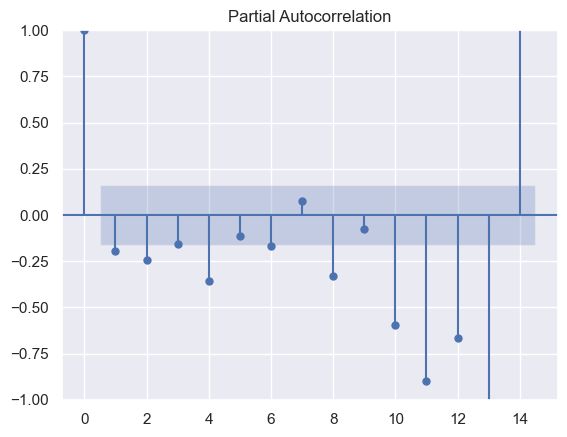

In [30]:
plot_pacf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

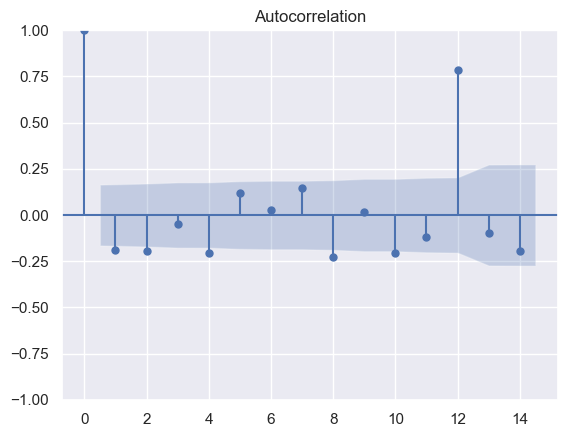

In [31]:
plot_acf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

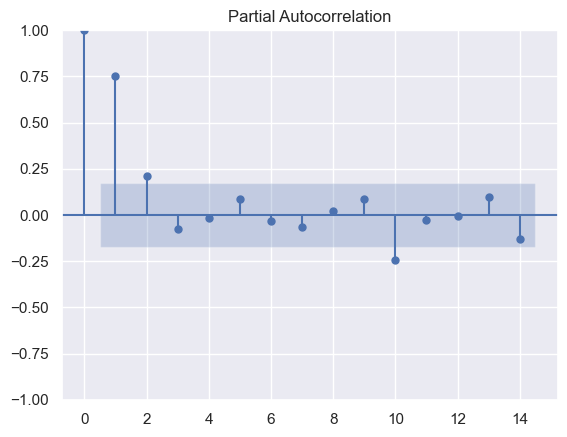

In [32]:
plot_pacf(dataset['Seasonality'].dropna(), lags=14)
plt.show()

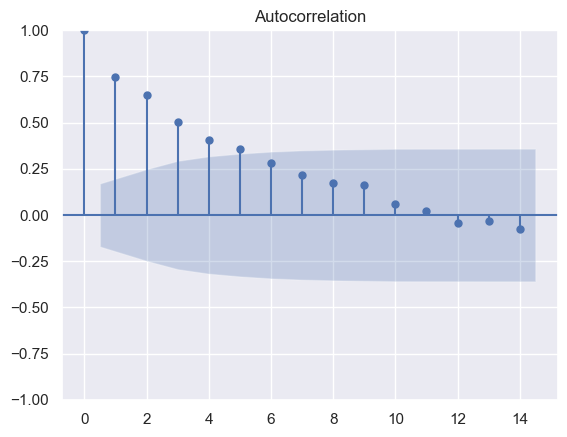

In [33]:
plot_acf(dataset['Seasonality'].dropna(), lags=14)
plt.show()

In [ ]:
# Trend : p d q
# d = 2 * augmented dickey fuller test
# p = 4 # Partial Autocorrelation
# q = 2 # Autocorrelation

# Seasonality
# P = 2
# D = 1
# Q = 5

# ARIMA